# Part 1, exploratory data analysis (EDA)

Вопросы:

1. [2 балла] Загрузка данных и предобработка - загрузите датасет, посмотрите на его `head` и `tail`. Похоже, некоторые факторы,  которые на самом деле числовые, у нас с вами замусорены. Так, например, фактор "Month" содержит в себе совершенно бесполезную приписку `c-`.  Давайте-ка всё почистим! С "Month" я уже разобрался, теперь ваша очередь справиться с остальными :) Наконец, еще раз посмтрите на начало датасета и воспользуйтесь функцией `describe()` для отображения базовых статистик переменных.
2. [1 балл] Сколько всего в датасете задержанных рейсов? 
3. [1 балл] Какое самое частое направление перелетов? Подсказка - это можно проверить, "сложив" два столбца друг с другом и применим к полученному новому столбцу `value_counts()`. 
4. [1 балл] При помощи `groupby` посчитайте среднее расстояние в зависимости от того, был задержан рейс или нет. Для какого случая значение получилось больше?
5. [1 балл] Визуализация - При помощи `heatmap` постройте тепловую карту корреляций для всего датасета и подпишите коэффициенты корреляции на графике. Размер можно задать figsize=(12, 10). Какая переменная сильнее всего положительно скоррелирована с нашей целевой переменной - задержкой рейса? 
6. [1 балл] Визуализация - Постройте гистограммы всех числовых переменных датасета при помощи одной команды. Для удобства отображения задайте размер графика `figsize` равным (25, 30).
7. [3 балла] Вопрос-сюрприз! Попробуйте самостоятельно придумать и происследовать 2 каких-нибудь осмысленных вопроса и/или визуализаций для вашего датасета. Инициатива не наказуема, так что удивите меня ;)

## Итого - 10 баллов, шикарная работа!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Комментарий к решению
Отлично, с загрузкой справились

In [2]:
import warnings
warnings.filterwarnings('ignore')

Задание 1: Загрузка данных и предобработка

In [3]:
data = pd.read_csv('/Users/anamac/Desktop/Maksimova_Anna_flight_delays.csv')
#Выведем на печать
data


,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
5,c-8,c-3,c-4,1918,NW,MEM,MCO,683,N
6,c-1,c-27,c-4,754,DL,PBI,LGA,1035,N
7,c-4,c-29,c-6,635,OH,MSP,CVG,596,N
8,c-7,c-28,c-5,735,AA,ONT,DFW,1189,N
9,c-6,c-20,c-2,2029,OO,DEN,PSC,853,N


In [4]:
data.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [5]:
data.tail()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,N
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,N
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,N
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,N
99999,c-11,c-17,c-4,1800,WN,SEA,SMF,605,N


### Комментарий к решению
С предобработкой тоже, а вот что делает ваша функция make_new1 пока непонятно - она ведь просто создала столбец из единичек (причем достаточно мудрёным способом), если судить по дальнейшим заданиям, столбец был нужен, чтобы считать число всяких разных элементов при помощи функции sum(), но можно было и не делать sum() к столбцу, а просто использовать count()

In [4]:
# сначала очистим месяц
data['Month'] = data['Month'].str.strip('c-').astype(int)
data['DayofMonth'] = data['DayofMonth'].str.strip('c-').astype(int)
data['DayOfWeek'] = data['DayOfWeek'].str.strip('c-').astype(int)



In [5]:
# а также перекодируем нашу целевую переменную - вместо N будет 0, а вместо Y будет 1
data.dep_delayed_15min = data.dep_delayed_15min.map({'N': 0, 'Y': 1})


In [8]:
def make_new1 (ds,feature1,feature2):
    ds[feature2]=ds[feature1]*0+1
    return(ds)
make_new1(data,'dep_delayed_15min','n1').head() #n1= 1 рейс (пригодится)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,n1
0,8,21,7,1934,AA,ATL,DFW,732,0,1
1,4,20,3,1548,US,PIT,MCO,834,0,1
2,9,2,5,1422,XE,RDU,CLE,416,0,1
3,11,25,6,1015,OO,DEN,MEM,872,0,1
4,10,7,6,1828,WN,MDW,OMA,423,1,1


In [9]:
data.head(10)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,n1
0,8,21,7,1934,AA,ATL,DFW,732,0,1
1,4,20,3,1548,US,PIT,MCO,834,0,1
2,9,2,5,1422,XE,RDU,CLE,416,0,1
3,11,25,6,1015,OO,DEN,MEM,872,0,1
4,10,7,6,1828,WN,MDW,OMA,423,1,1
5,8,3,4,1918,NW,MEM,MCO,683,0,1
6,1,27,4,754,DL,PBI,LGA,1035,0,1
7,4,29,6,635,OH,MSP,CVG,596,0,1
8,7,28,5,735,AA,ONT,DFW,1189,0,1
9,6,20,2,2029,OO,DEN,PSC,853,0,1


In [10]:
data.describe()

,Month,DayofMonth,DayOfWeek,DepTime,Distance,dep_delayed_15min,n1
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.00000,100000.0
mean,6.537640,15.703850,3.95183,1341.523880,729.39716,0.19044,1.0
std,3.413447,8.793931,1.99164,476.378445,574.61686,0.39265,0.0
min,1.000000,1.000000,1.00000,1.000000,30.00000,0.00000,1.0
25%,4.000000,8.000000,2.00000,931.000000,317.00000,0.00000,1.0
50%,7.000000,16.000000,4.00000,1330.000000,575.00000,0.00000,1.0
75%,9.000000,23.000000,6.00000,1733.000000,957.00000,0.00000,1.0
max,12.000000,31.000000,7.00000,2534.000000,4962.00000,1.00000,1.0


### Комментарий к решению
Верно :)

Задание 2: сколько всего в датасете задержанных рейсов

In [11]:
#находим кол-во задержанных рейсов 

data.loc[data['dep_delayed_15min'] == 1].sum()



Month                                                           126781
DayofMonth                                                      307987
DayOfWeek                                                        76075
DepTime                                                       30108565
UniqueCarrier        WNOOEVEVUSWNAQYVFLUAOHWNMQWNWNASYVXEAACODLEVDL...
Origin               MDWSLCATLATLCLTSANOAKSEAATLDENLGARNOBNASANLAXS...
Dest                 OMASEAILMMYRCHSSMFLASPHXMSPDTWJAXPDXORDSJCPHXA...
Distance                                                      13828948
dep_delayed_15min                                                19044
n1                                                               19044
dtype: object

получилось 19044 рейса

### Комментарий к решению
Круто-круто, еще и через функцию. Только в пункте "сохраним оригинальную таблицу" нужно было написать `data_original=data.copy()`, иначе питон создаст новый указатель на старый объект, а не новый объект, но это так, для общего развития :)

Задание 3: самое частое направление перелетов

In [12]:
def make_conj (ds,feature1,feature2):
    ds[feature1+' to '+feature2]=ds[feature1].astype(str)+' to '+ds[feature2].astype(str)
    return(ds)
#сохраним оригинальную таблицу
data_original=data 
#соединим аэропорты прилета и вылета 
make_conj(data,'Origin','Dest')
data.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,n1,Origin to Dest
0,8,21,7,1934,AA,ATL,DFW,732,0,1,ATL to DFW
1,4,20,3,1548,US,PIT,MCO,834,0,1,PIT to MCO
2,9,2,5,1422,XE,RDU,CLE,416,0,1,RDU to CLE
3,11,25,6,1015,OO,DEN,MEM,872,0,1,DEN to MEM
4,10,7,6,1828,WN,MDW,OMA,423,1,1,MDW to OMA


In [13]:
#суммируем по направлениям

data['Origin to Dest'].value_counts()



SAN to LAX    217
LAS to LAX    186
LGA to ORD    184
LAX to SAN    182
LAX to PHX    181
LAX to LAS    179
DCA to LGA    178
BOS to LGA    176
LGA to DCA    173
PHX to LAS    164
HNL to OGG    163
ORD to LGA    161
LGA to BOS    158
LAX to SJC    154
SJC to LAX    153
LAS to PHX    149
OGG to HNL    148
DFW to ORD    146
SFO to LAX    145
DFW to ATL    144
JFK to LAX    142
MSP to ORD    142
ATL to DFW    136
DAL to HOU    136
ATL to LGA    135
DCA to BOS    134
PHX to LAX    133
OAK to LAX    132
DEN to DFW    132
LGA to ATL    131
             ... 
DTW to RNO      1
JAX to CLE      1
SFO to IND      1
SFO to ANC      1
OGG to ATL      1
MCO to CHS      1
PSE to EWR      1
MSN to LGA      1
CLT to CAE      1
SRQ to IND      1
DEN to GRR      1
DEN to RSW      1
TPA to MKE      1
OAK to ITO      1
MCO to BUR      1
SAT to STL      1
SLC to DSM      1
AVP to JFK      1
MCO to LEX      1
CLT to MOB      1
IAH to VCT      1
CLE to ERI      1
PDX to BUR      1
DFW to PVD      1
DAY to MIA

Чаще всего самолеты летают San Francisco в Los Angeles

### Комментарий к решению
Вы сделали всё абсолютно верно, правда можно было сделать чуть проще :)

In [7]:
data.groupby('dep_delayed_15min').Distance.mean()

dep_delayed_15min
0    730.159198
1    726.157740
Name: Distance, dtype: float64

In [ ]:
data.groupby

Задание 4: среднее расстояние для задержанных и не задержанных рейсов

In [14]:
data_kol = data['dep_delayed_15min'].value_counts()
data_kol


0    80956
1    19044
Name: dep_delayed_15min, dtype: int64

In [15]:
kol0 = data_kol.iloc[0]
kol1 = data_kol.iloc[1]
print(kol0,kol1) #количество рейсов 

80956 19044


In [16]:
data_dis = data.groupby('dep_delayed_15min').sum()
data_dis

,Month,DayofMonth,DayOfWeek,DepTime,Distance,n1
dep_delayed_15min,,,,,,
0,526983,1262398,319108,104043823,59110768,80956
1,126781,307987,76075,30108565,13828948,19044


In [17]:
dis0 = data_dis.iloc[0,4]
dis1 = data_dis.iloc[1,4]

print(dis0,dis1) #суммарная дальность полетов

59110768 13828948


In [18]:
print('Средняя дальность полетов рейсов без задержки')
d0=dis0/kol0
print (d0)
print('Средняя дальность полетов рейсов с задержкой')
d1=dis1/kol1
print (d1) 


Средняя дальность полетов рейсов без задержки
730.1591975888136
Средняя дальность полетов рейсов с задержкой
726.1577399705944


In [19]:
if d1>d0: 
    print("Средняя дальность полетов рейсов с задержкой больше")
else: 
    print("Средняя дальность полетов рейсов с задержкой меньше")

Средняя дальность полетов рейсов с задержкой меньше


### Комментарий к решению
И здесь всё хорошо

Задание 5:

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

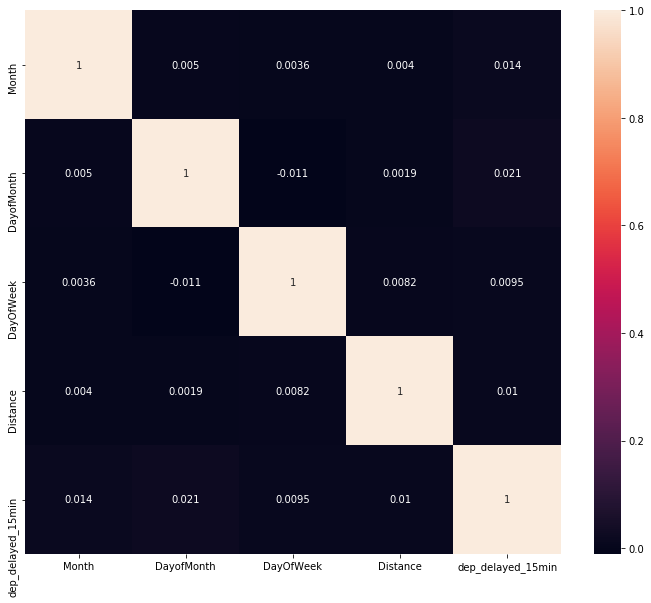

In [21]:
data_n = data.drop(['DepTime', 'Origin', 'Dest', 'n1'], axis=1)
plt.figure(figsize=(12, 10))
sns.heatmap(data_n.corr('kendall'), annot=True);

Все корелляции незначительны. 
Максимальная корелляция (0.021) обнаружена между задержкой и числом месяца 

### Комментарий к решению
Отлично :)

Задание 6: гистограммы всех числовых переменных датасета 

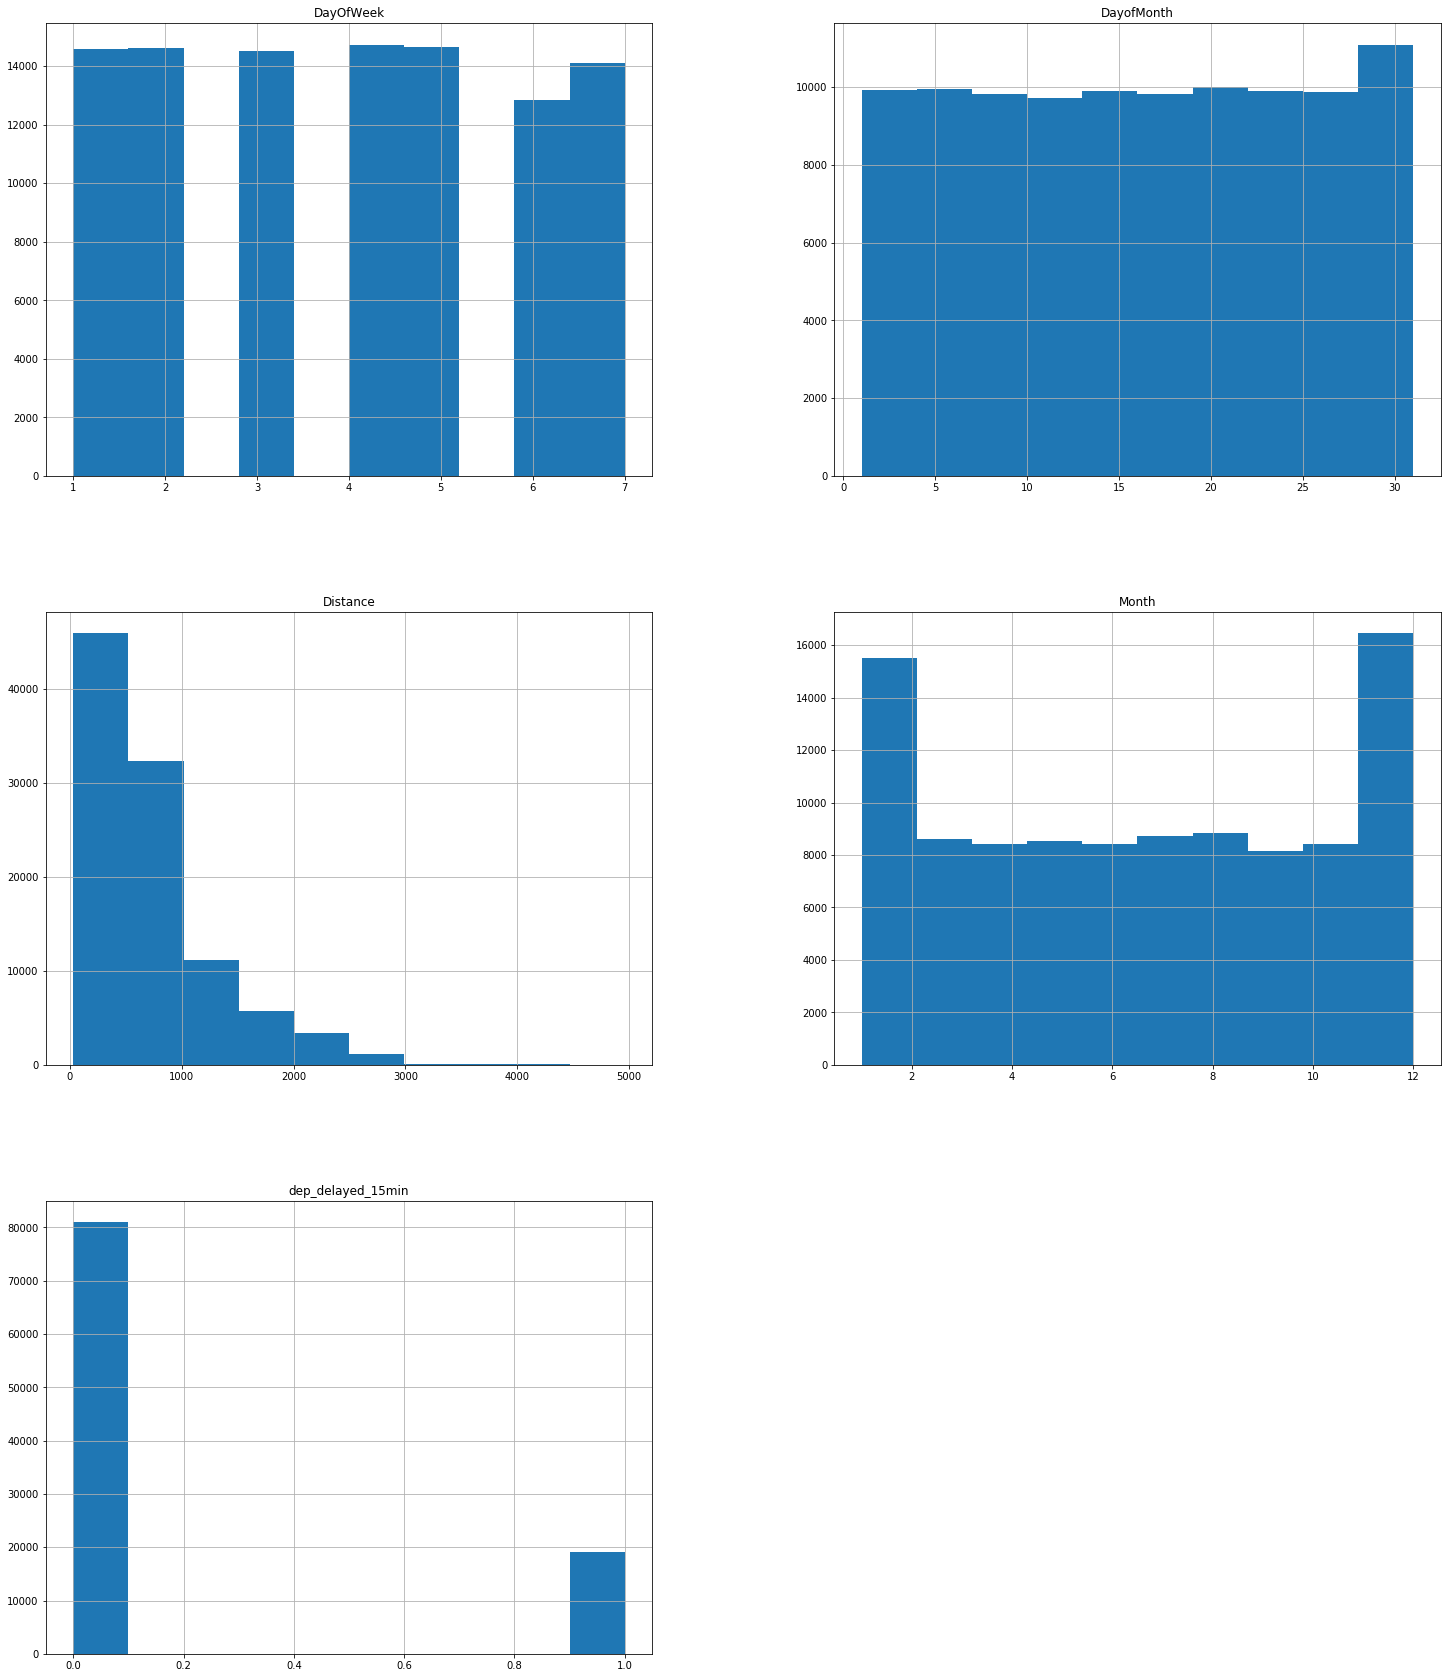

In [22]:
#deptime будет распределен в задании 7, так как требует работы с часами
data_n.hist(figsize=(25, 30));

### Комментарий к решению
Очень крутые вопросы, 10 из 10 :D 

Задание 7(1): Какой рейс чаще всего задерживают?

In [23]:
#суммируем по направлениям
data_sort_del = data.groupby('Origin to Dest').sum()
data_sort_del.head()

,Month,DayofMonth,DayOfWeek,DepTime,Distance,dep_delayed_15min,n1
Origin to Dest,,,,,,,
ABE to ATL,97,231,49,14992,8304,2,12
ABE to CLE,106,338,67,25388,6102,0,18
ABE to CLT,12,23,7,1685,962,0,2
ABE to CVG,99,291,75,20455,8551,4,17
ABE to DTW,12,78,17,4236,1696,0,4


In [24]:
#сортируем по наибольшему кол-ву задержек
data_sort_del = data_sort_del.sort_values(by='dep_delayed_15min', ascending=0)
data_sort_del.head()

,Month,DayofMonth,DayOfWeek,DepTime,Distance,dep_delayed_15min,n1
Origin to Dest,,,,,,,
ATL to LGA,968,1954,526,189231,102735,50,135
ORD to LGA,1054,2583,600,214385,118013,45,161
LAS to LAX,1170,2904,731,255499,43896,40,186
ATL to EWR,786,1997,476,169531,89400,39,120
LAX to LAS,1194,2788,777,255583,42244,37,179


Самый задерживаемый рейс: 
Атланта, Соединенные Штаты (ATL) – Нью-Йорк, Соединенные Штаты (LGA)

Задание 7(2): в какое время чаще всего задерживают рейс? (распределение по часам)

In [25]:
data_del = data[data['dep_delayed_15min'] == 1]
data_del.head() #берем данные только из задержанных рейсов

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,n1,Origin to Dest
4,10,7,6,1828,WN,MDW,OMA,423,1,1,MDW to OMA
18,10,14,5,1704,OO,SLC,SEA,689,1,1,SLC to SEA
21,6,21,3,1519,EV,ATL,ILM,377,1,1,ATL to ILM
33,12,3,7,1653,EV,ATL,MYR,317,1,1,ATL to MYR
35,3,24,4,2303,US,CLT,CHS,168,1,1,CLT to CHS


In [26]:
def time_cut(n):
    n=n//100
    return(n)
data_del['DepTimeCut'] = time_cut(data_del['DepTime'])
#новый столбец TimeCut показывает время отправления в часах

data_del.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,n1,Origin to Dest,DepTimeCut
4,10,7,6,1828,WN,MDW,OMA,423,1,1,MDW to OMA,18
18,10,14,5,1704,OO,SLC,SEA,689,1,1,SLC to SEA,17
21,6,21,3,1519,EV,ATL,ILM,377,1,1,ATL to ILM,15
33,12,3,7,1653,EV,ATL,MYR,317,1,1,ATL to MYR,16
35,3,24,4,2303,US,CLT,CHS,168,1,1,CLT to CHS,23


### Комментарий к решению
Еще и нестандартные значения нашли, прекрасно!

In [27]:
#в сете есть время, начинающееся с 24 и 25, перекодируем его в 00 и 01 соответственно 
data_del = data_del.replace(to_replace=[25], value=[ 1])
data_del = data_del.replace(to_replace=[24], value=[ 0]) 
data_del['DepTimeCut'].value_counts()


18    1709
19    1678
17    1563
20    1491
16    1429
15    1383
21    1368
13    1201
14    1183
12    1093
11     948
10     846
22     770
9      724
8      509
7      361
23     360
0      186
6      159
1       52
2       12
5       11
3        5
4        3
Name: DepTimeCut, dtype: int64

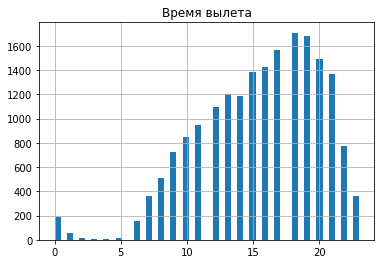

In [28]:
data_del['DepTimeCut'].hist(bins=50)
plt.title("Время вылета");

Наибольшее количество самолетов взлетает с 15 до 20 часов. Наименьшее - с 1 до 6.
Самый "популярный" час - 18 

Задание 7(3): Самый задерживаемый рейс в %

In [29]:
data_sort_del.head()

,Month,DayofMonth,DayOfWeek,DepTime,Distance,dep_delayed_15min,n1
Origin to Dest,,,,,,,
ATL to LGA,968,1954,526,189231,102735,50,135
ORD to LGA,1054,2583,600,214385,118013,45,161
LAS to LAX,1170,2904,731,255499,43896,40,186
ATL to EWR,786,1997,476,169531,89400,39,120
LAX to LAS,1194,2788,777,255583,42244,37,179


In [30]:
def percent (ds,feature1,feature2,feature3):
    ds[feature3]=round(((ds[feature1]/ds[feature2])*100),2)
    return(ds)
per = percent(data_sort_del,'dep_delayed_15min','n1','percentage')
per.head()

,Month,DayofMonth,DayOfWeek,DepTime,Distance,dep_delayed_15min,n1,percentage
Origin to Dest,,,,,,,,
ATL to LGA,968,1954,526,189231,102735,50,135,37.04
ORD to LGA,1054,2583,600,214385,118013,45,161,27.95
LAS to LAX,1170,2904,731,255499,43896,40,186,21.51
ATL to EWR,786,1997,476,169531,89400,39,120,32.50
LAX to LAS,1194,2788,777,255583,42244,37,179,20.67


In [39]:
per= per.sort_values(by='percentage', ascending=0)
per


,Month,DayofMonth,DayOfWeek,DepTime,Distance,dep_delayed_15min,n1,percentage
Origin to Dest,,,,,,,,
PHL to LGA,12,42,11,4404,192,2,2,100.0
PHL to MEM,3,26,6,1732,874,1,1,100.0
MSY to JAX,6,27,1,1032,513,1,1,100.0
RSW to CMH,17,34,4,2885,1860,2,2,100.0
MEM to SJU,2,18,6,1015,1863,1,1,100.0
BOS to TTN,12,23,6,1005,245,1,1,100.0
MEM to SLC,4,7,5,945,1261,1,1,100.0
TPA to RIC,10,5,3,1338,723,1,1,100.0
TPA to MKE,2,5,6,1546,1075,1,1,100.0


### Комментарий к решению
Действительно ВАУ, сколько же времени эти ребята теряют из-за задержек

ВАУ, У нас есть куча редких рейсов, которые задерживаются каждый раз

In [40]:
make_new1(per,'n1','n1').head() #очищаем n1, дабы узнать количество рейсов

,Month,DayofMonth,DayOfWeek,DepTime,Distance,dep_delayed_15min,n1,percentage
Origin to Dest,,,,,,,,
PHL to LGA,12,42,11,4404,192,2,1,100.0
PHL to MEM,3,26,6,1732,874,1,1,100.0
MSY to JAX,6,27,1,1032,513,1,1,100.0
RSW to CMH,17,34,4,2885,1860,2,1,100.0
MEM to SJU,2,18,6,1015,1863,1,1,100.0


In [45]:
per100 = per.loc[per['percentage'] == 100].sum()

In [53]:
print ('Количество вечно задерживающихся рейсов: ' + str(per100['n1']))

Количество вечно задерживающихся рейсов: 63.0


Работа 10 из 10, так держать!